# Visualization

## Import relevant libraries

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Load data

In [20]:
# setup data path
base_path = os.path.join('..', 'datasets')
ac_df_path = os.path.join(base_path, 'processed_data', 'area_chart.csv')
sc_df_path = os.path.join(base_path, 'processed_data', 'slope_chart.csv')

In [21]:
# load datasets
ac_df = pd.read_csv(ac_df_path)
sc_df = pd.read_csv(sc_df_path)

## Area Chart

In [22]:
ac_df.head()

,month,month_name,year,price,price_pct_change
0,1,Jan,2014,938.888159,0.0
1,1,Jan,2015,1011.513659,0.0
2,1,Jan,2016,977.669773,0.0
3,1,Jan,2017,1054.820534,0.0
4,1,Jan,2018,1115.220955,0.0


In [23]:
# populate tables for visualization
for year in ac_df.year.unique():
    var_name = '_'.join(['ac_df', str(year)])
    vars()[var_name] = ac_df[ac_df['year'] == year]
    print('A variable `{}` was created!'.format(var_name))

A variable `ac_df_2014` was created!
A variable `ac_df_2015` was created!
A variable `ac_df_2016` was created!
A variable `ac_df_2017` was created!
A variable `ac_df_2018` was created!


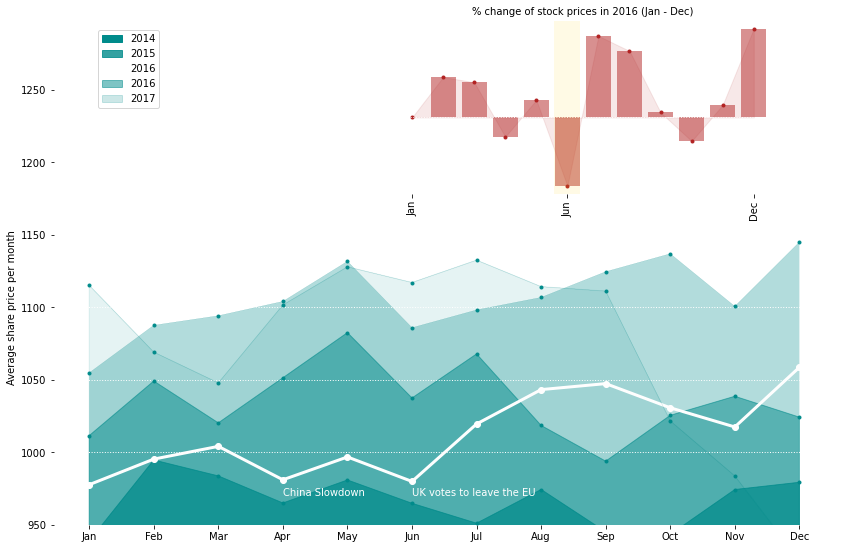

In [82]:
# create a figure
fig = plt.figure(figsize = (14, 8))

# customize subplot
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_axes([0.45, 0.7, 0.4, 0.3])
ax1.set_ylim(950, 1250)

# setting up ax1

# populate plots
# 2014
ax1.plot(ac_df_2014['month_name'], ac_df_2014['price'], color= "darkcyan", marker = '.', linewidth = 0.1)
ax1.fill_between(ac_df_2014['month_name'], ac_df_2014['price'], color = 'darkcyan', alpha = 0.7)
# 2015
ax1.plot(ac_df_2015['month_name'], ac_df_2015['price'], color= "darkcyan", marker = '.', linewidth = 0.1)
ax1.fill_between(ac_df_2015['month_name'], ac_df_2015['price'], color = 'darkcyan', alpha = 0.5)
# 2016
ax1.plot(ac_df_2016['month_name'], ac_df_2016['price'], color="white", alpha=2, marker = 'o', linewidth = 3)
# 2017
ax1.plot(ac_df_2017['month_name'], ac_df_2017['price'], color="darkcyan", marker = '.', linewidth = 0.1)
ax1.fill_between(ac_df_2017['month_name'], ac_df_2017['price'], alpha = 0.3, facecolor = 'darkcyan')
# 2018
ax1.plot(ac_df_2018['month_name'], ac_df_2018['price'], color= "darkcyan", marker = '.', linewidth = 0.1)
ax1.fill_between(ac_df_2018['month_name'], ac_df_2018['price'], color = 'darkcyan', alpha = 0.1)

# label events
ax1.annotate("UK votes to leave the EU", ('Jun', 970), color = 'white') #will need to add arrows
ax1.annotate("China Slowdown", ('Apr', 970),  color = 'white')

# set label
ax1.set_ylabel("Average share price per month")

# set legends
dca_patch = mpatches.Patch(color='darkcyan', alpha = 0.1, label='2018')
dca1_patch = mpatches.Patch(color='darkcyan', alpha = 0.2, label='2017')
dca2_patch = mpatches.Patch(color='darkcyan', alpha = 0.5, label='2016')
dca3_patch = mpatches.Patch(color='darkcyan', alpha = 0.8, label='2015')
dca4_patch = mpatches.Patch(color='darkcyan', alpha = 1, label='2014')
white_patch = mpatches.Patch(color='white' ,label='2016')
ax1.legend(handles=[dca4_patch, dca3_patch,  white_patch, dca2_patch, dca1_patch],
         loc='upper left', bbox_to_anchor=(0.05, 1.15))

ax1.grid(axis='y', color = 'white', linewidth = 1, alpha = 1, ls = ':')

# remove spines
for spine in ['left', 'right', 'top', 'bottom']:
    ax1.spines[spine].set_visible(False)

# setting up ax2

# populate plots
ax2.bar(ac_df_2016['month_name'], ac_df_2016['price_pct_change'], 
        color = 'firebrick', linewidth = 0.5, alpha = 0.5)
ax2.fill_between(ac_df_2016['month_name'], ac_df_2016['price_pct_change'], 
                 color = 'firebrick', alpha = 0.1)
ax2.plot(ac_df_2016['month_name'], ac_df_2016['price_pct_change'], 
         'ro', color = 'firebrick', marker = '.')
ax2.grid(axis='y', color = 'white', linewidth = 1, alpha = 1, ls = ':')

ax2.axhline(linewidth=1, color='white', alpha=0.9, ls= ':') ### what is this line for?
# label brexit referendum period
ax2.axvline(x='Jun',linewidth=26, alpha=0.1, color='gold')

ax2.set_title("% change of stock prices in 2016 (Jan - Dec)", size = 10)
ax2.set_ylabel

# set tick labels
my_xticks = ax2.get_xticks()
plt.xticks([my_xticks[0], my_xticks[5], my_xticks[-1]], visible=True, rotation="vertical")
plt.yticks(visible=False)
ax2.axes.yaxis.set_visible(False) ### the tick on y-axis, you want to leave it or you forgot to remove it?

# remove spines
for spine in ['left', 'right', 'top', 'bottom']:
    ax2.spines[spine].set_visible(False)
    
# save plot
path = os.path.join('output', 'area_chart.png')
plt.savefig(path)